In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def softmax(x0,x1,x2):
    u=np.exp(x0)+np.exp(x1)+np.exp(x2)
    return np.exp(x0)/u,np.exp(x1)/u,np.exp(x2)/u

y=softmax(2,1,-1)
print(np.round(y,2))
print(np.sum(y))

[0.71 0.26 0.04]
1.0


In [3]:
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

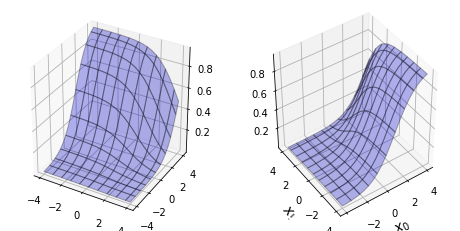

In [4]:
xn=20
x0=np.linspace(-4,4,xn)
x1=np.linspace(-4,4,xn)

y=np.zeros((xn,xn,3))
for i0 in range(xn):
    for i1 in range(xn):
        y[i0,i1, :]=softmax(x0[i0],x1[i1],1)

xx0,xx1=np.meshgrid(x0,x1)
plt.figure(figsize=(8,4))
for i in range(2):
    ax=plt.subplot(1,2,i+1,projection='3d')
    ax.plot_surface(xx0,xx1,y[:,:,i],rstride=2,cstride=2,alpha=0.3,color='blue',edgecolor='black')
ax.set_xlabel("$x_0$",fontsize=14)
ax.set_ylabel("$x_!$",fontsize=14)
ax.view_init(40,-125)

plt.show()

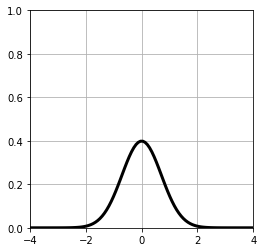

In [5]:
def gauss(mu,sigma):
    a=1/np.sqrt(2*np.pi*sigma**2)
    return a*np.exp(-(x-mu)**2/sigma**2)

x=np.linspace(-4,4,100)
plt.figure(figsize=(4,4))
plt.plot(x,gauss(0,1),'black',linewidth=3)
plt.ylim(0,1)
plt.xlim(-4,4)
plt.grid(True)
plt.show()

In [6]:
def gauss(x,mu,sigma):
    N,D=x.shape
    c1=1/(2*np.pi)**(D/2)
    c2=1/(np.linalg.det(sigma)**(1/2))
    inv_sigma=np.linalg.inv(sigma)
    c3=x-mu
    c4=np.dot(c3,inv_sigma)
    c5=np.zeros(N)
    for d in range(D):
        c5=c5+c4[:,d]*c3[:,d]
    p=c1*c2*np.exp(-c5/2)
    return p

x=np.array([[1,2],[2,1],[3,4]])
mu=np.array([1,2])
sigma=np.array([[1,0],[0,1]])
print(gauss(x,mu,sigma))

[0.15915494 0.05854983 0.00291502]


In [11]:
def gauss(x,mu,sigma):
    N,D=x.shape
    c1=1/(2*np.pi)**(D/2)
    c2=1/(np.linalg.det(sigma)**(1/2))
    inv_sigma=np.linalg.inv(sigma)
    c3=x-mu
    c4=np.dot(c3,inv_sigma)
    c5=np.zeros(N)
    for d in range(D):
        c5=c5+c4[:,d]*c3[:,d]
    p=c1*c2*np.exp(-c5/2)
    return p

X_range0=[-3,3]
X_range1=[-3,3]


def show_contour_gauss(mu, sig):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn,order="F"), np.reshape(xx1, xn * xn, order="F")]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, 15, colors='k')
    plt.grid(True)
    
def show3d_gauss(ax, mu, sig):
    xn = 40 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, order="F"), np.reshape(xx1, xn * xn,order="F")]
    f = gauss(x, mu, sig)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f,
                    rstride=2, cstride=2, alpha=0.3,
                    color='blue', edgecolor='black')

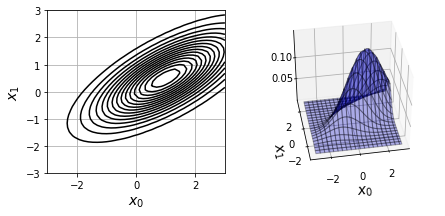

In [12]:
mu = np.array([1, 0.5]) # (A)
sigma = np.array([[2, 1], [1, 1]]) # (B)
Fig = plt.figure(1, figsize=(7, 3))
Fig.add_subplot(1, 2, 1)
show_contour_gauss(mu, sigma)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
Ax = Fig.add_subplot(1, 2, 2, projection='3d')
show3d_gauss(Ax, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel('$x_0$', fontsize=14)
Ax.set_ylabel('$x_1$', fontsize=14)
Ax.view_init(40, -100)
plt.show()

In [69]:
np.random.seed(seed=1)
X_min=4
X_max=30
X_n=16
X=5+25*np.random.rand(X_n)
Prm_c=[170,108,0.2]
T=Prm_c[0]-Prm_c[1]*np.exp(-Prm_c[2]*X)+4*np.random.randn(X_n)
np.savez('ch5_data.npz',X=X,X_min=X_min,X_max=X_max,X_n=X_n,T=T)

In [70]:
print(np.round(X,2))
print(np.round(T,2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


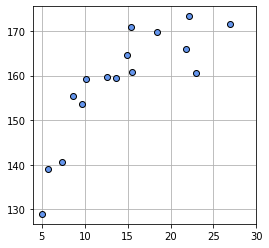

In [72]:
plt.figure(figsize=(4,4))
plt.plot(X,T,marker='o',linestyle='None',markeredgecolor='black',color='cornflowerblue')
plt.xlim(X_min,X_max)
plt.grid(True)
plt.show()

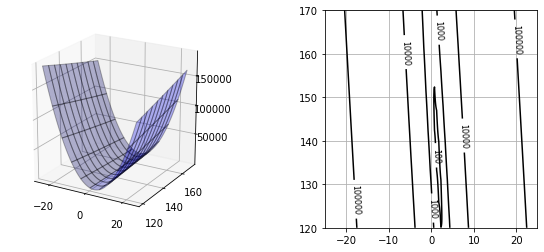

In [77]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x,t,w):
    y=w[0]*x+w[1]
    mse=np.mean((y-t)**2)
    return mse

xn=100
w0_range=[-25,25]
w1_range=[120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1=np.meshgrid(x0,x1)
j=np.zeros((len(x0),len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        j[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))
        
plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,j,rstride=10,cstride=10,alpha=0.3,color='blue',edgecolor='black')
ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont=plt.contour(xx0,xx1,j,30,colors='black',levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
plt.show()

In [89]:
def dmse_line(x,t,w):
    y=w[0]*x+w[1]
    d_w0=2*np.mean((y-t)*x)
    d_w1=2*np.mean(y-t)
    return d_w0,d_w1

def fit_line_num(x,t):
    w_init=[10.0,165.0]
    alpha=0.001
    i_max=100000
    eps=0.1
    w_i=np.zeros([i_max,2])
    w_i[0, :]=w_init
    for i in range(1,i_max):
        dmse=dmse_line(x,t,w_i[i-1])
        w_i[i,0]=w_i[i-1,0]-alpha*dmse[0]
        w_i[i,1]=w_i[i-1,1]-alpha*dmse[1]
        if max(np.absolute(dmse))<eps:
            break
        w0=w_i[i,0]
        w1=w_i[i,1]
        w_i=w_i[:i,:]
        return w0,w1,dmse,w_i


반복횟수 1
W=[4.953714,164.698203]
dMSE=[5046.286438,301.797205]
MSE=6577.120822


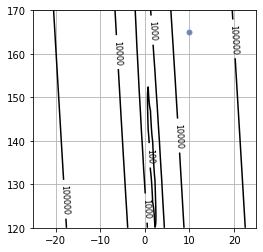

In [90]:
plt.figure(figsize=(4,4))
xn=100
w0_range=[-25,25]
w1_range=[120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)
xx0,xx1=np.meshgrid(x0,x1)

J=np.zeros((len(x0),len(x0)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1,i0]=mse_line(X,T,(x0[i0],x1[i1]))
    
cont=plt.contour(xx0,xx1,J,30,colors='black',levels=(100,1000,10000,100000))
cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)
  
W0,W1,dMSE,W_history=fit_line_num(X,T)

print('반복횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f},{1:.6f}]'.format(W0,W1))
print('dMSE=[{0:.6f},{1:.6f}]'.format(dMSE[0],dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X,T,[W0,W1])))
plt.plot(W_history[:,0],W_history[:,1],'.-',color='grey',markersize=10,markeredgecolor='cornflowerblue')
plt.show()

반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


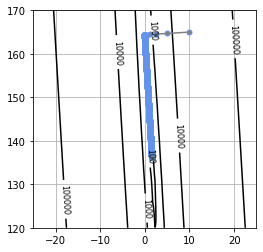

In [92]:
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: # 종료판정, np.absolute는 절대치
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i


# 메인 ------------------------------------
plt.figure(figsize=(4, 4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)
# 구배법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)
# 결과보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()


In [95]:
w_init = [10.0, 165.0] 
i_max = 100000 
w_i = np.zeros([i_max, 2])
w_i[0, :] = w_init
print(w_i) 

[[ 10. 165.]
 [  0.   0.]
 [  0.   0.]
 ...
 [  0.   0.]
 [  0.   0.]
 [  0.   0.]]
